In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
import random as rn
import iso_forest_w as iso
import seaborn as sb
sb.set_style(style="whitegrid")
sb.set_color_codes()



/Users/yeomsijin/Library/Mobile Documents/com~apple~CloudDocs/CODING/iso_forest-master weighted/iso_forest.py:11: UserWarning: No igraph interface for plotting trees
  warnings.warn("No igraph interface for plotting trees")


## Create fake data

In [19]:
from scipy import io

musk = io.loadmat('musk.mat')





In [29]:
X = musk['X']
Y = musk['y']

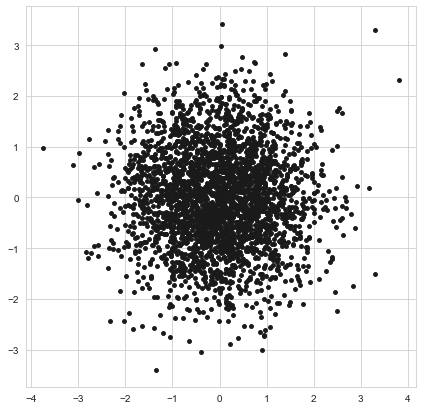

In [14]:
np.random.seed(0)
mean = [0, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance
Nobjs = 3000
x, y = np.random.multivariate_normal(mean, cov, Nobjs).T
#Add manual outlier
x[0]=3.3
y[0]=3.3
X=np.array([x,y]).T
plt.figure(figsize=(7,7))
plt.scatter(x,y,s=15,facecolor='k',edgecolor='k')


In [22]:
type(X)

numpy.ndarray

## Create Forest

In [68]:
F = iso.iForest(X,ntrees=100, sample_size=256)

## Computing path for All objects

In [69]:
S=F.compute_paths(X_in=X)

In [70]:
Y.shape

(3062, 1)

In [71]:
np.where(Y==1)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

In [74]:
np.where(S>0.53)[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96])

### Plotting anomaly distribution

/Users/yeomsijin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='anomaly score', ylabel='Density'>

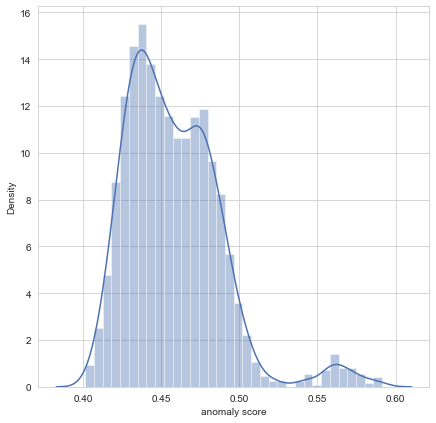

In [73]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sb.distplot(S, kde=True, color="b", ax=axes, axlabel='anomaly score')

## sorting by anomaly, plotting 10 top (non) anomalies in black (red)

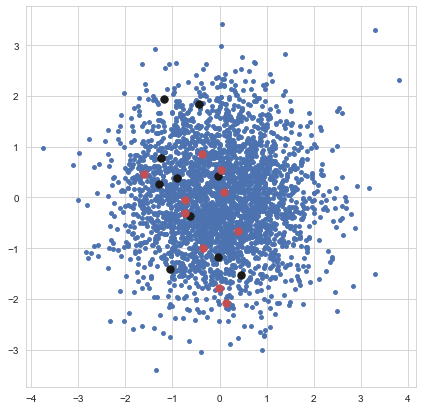

In [26]:
ss=np.argsort(S)
plt.figure(figsize=(7,7))
plt.scatter(x,y,s=15,c='b',edgecolor='b')
plt.scatter(x[ss[-10:]],y[ss[-10:]],s=55,c='k')
plt.scatter(x[ss[:10]],y[ss[:10]],s=55,c='r')

## Another example, sin function with gaussian error

In [7]:
N = 4000
x2 = np.random.rand(N)
y2 = np.sin(x2*10.) + np.random.randn(N)/2.

## Add outliers by hand

(0.0, 1.0)

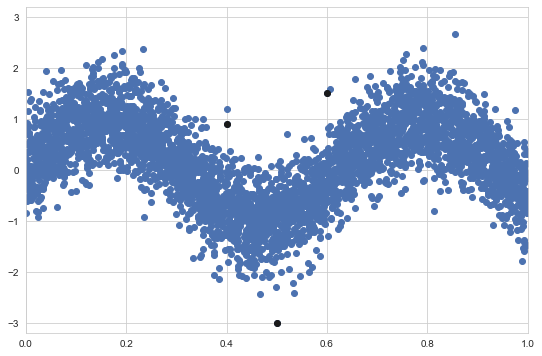

In [8]:
x2[0]=0.4; y2[0]=0.9
x2[1]=0.6; y2[1]=1.5
x2[2]=0.5; y2[2]=-3.
X2=np.array([x2,y2]).T
plt.figure(figsize=(9,6))
plt.scatter(x2,y2,c='b',edgecolor='b')
plt.scatter(x2[:3],y2[:3],c='k')
plt.ylim(-3.2,3.2)
plt.xlim(0,1)

In [9]:
F2 = iso.iForest(X2,ntrees=500, sample_size=512)

In [10]:
S2=F2.compute_paths(X_in=X2)

/Users/yeomsijin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='anomaly score', ylabel='Density'>

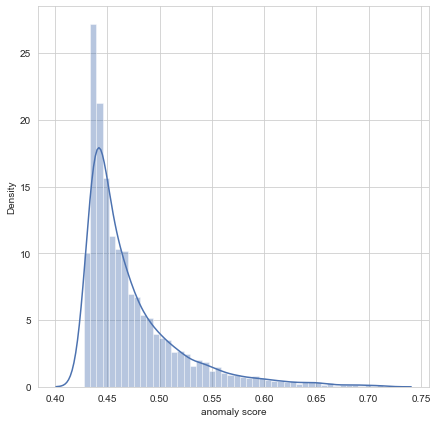

In [11]:
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sb.distplot(S2, kde=True, color="b", ax=axes, axlabel='anomaly score')

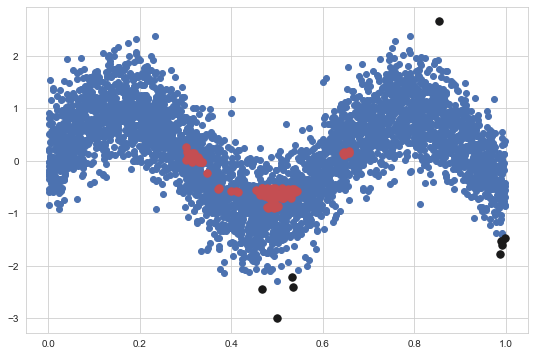

In [12]:
ss=np.argsort(S2)
plt.figure(figsize=(9,6))
plt.scatter(x2,y2,c='b',edgecolors='b')
plt.scatter(x2[ss[-10:]],y2[ss[-10:]],s=55,c='k')
plt.scatter(x2[ss[:100]],y2[ss[:100]],s=55,c='r')